In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc

Loading Data

In [113]:
df = pd.read_csv('Cancer_Data.csv')

In [114]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115


In [115]:
df.tail()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,1.1760,1.256,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,0.7655,2.463,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,0.4564,1.075,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,0.7260,1.595,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185
568,92751,B,7.76,24.54,47.92,181.0,0.05263,0.04362,0.00000,0.00000,...,0.3857,1.428,2.548,19.15,0.007189,0.00466,0.00000,0.00000,0.02676,0.002783


Check dtypes column from dataset

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 22 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   id                      569 non-null    int64  
 1   diagnosis               569 non-null    object 
 2   radius_mean             569 non-null    float64
 3   texture_mean            569 non-null    float64
 4   perimeter_mean          569 non-null    float64
 5   area_mean               569 non-null    float64
 6   smoothness_mean         569 non-null    float64
 7   compactness_mean        569 non-null    float64
 8   concavity_mean          569 non-null    float64
 9   concave points_mean     569 non-null    float64
 10  symmetry_mean           569 non-null    float64
 11  fractal_dimension_mean  569 non-null    float64
 12  radius_se               569 non-null    float64
 13  texture_se              569 non-null    float64
 14  perimeter_se            569 non-null    fl

Descriptive Statistics

In [117]:
df.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,0.405172,1.216853,2.866059,40.337079,0.007041,0.025478,0.031894,0.011796,0.020542,0.003795
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,0.277313,0.551648,2.021855,45.491006,0.003003,0.017908,0.030186,0.006170,0.008266,0.002646
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,0.111500,0.360200,0.757000,6.802000,0.001713,0.002252,0.000000,0.000000,0.007882,0.000895
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,0.232400,0.833900,1.606000,17.850000,0.005169,0.013080,0.015090,0.007638,0.015160,0.002248
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,0.324200,1.108000,2.287000,24.530000,0.006380,0.020450,0.025890,0.010930,0.018730,0.003187
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,0.478900,1.474000,3.357000,45.190000,0.008146,0.032450,0.042050,0.014710,0.023480,0.004558
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,2.873000,4.885000,21.980000,542.200000,0.031130,0.135400,0.396000,0.052790,0.078950,0.029840


Check Missing Values

In [118]:
df.isnull().sum()

id                        0
diagnosis                 0
radius_mean               0
texture_mean              0
perimeter_mean            0
area_mean                 0
smoothness_mean           0
compactness_mean          0
concavity_mean            0
concave points_mean       0
symmetry_mean             0
fractal_dimension_mean    0
radius_se                 0
texture_se                0
perimeter_se              0
area_se                   0
smoothness_se             0
compactness_se            0
concavity_se              0
concave points_se         0
symmetry_se               0
fractal_dimension_se      0
dtype: int64

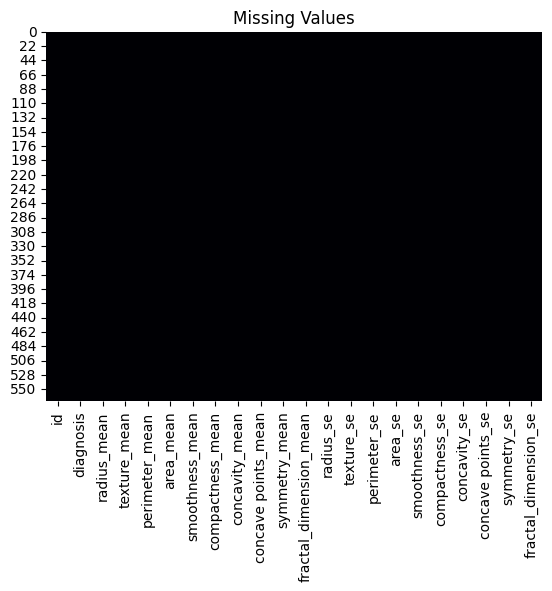

In [119]:
# No Missing Values
plt.title("Missing Values")
sns.heatmap(df.isnull(), cbar=False, cmap="magma")
plt.show()

Drop Column

In [120]:
df.drop(columns=["id"],axis=1, inplace=True)

Split Column into Numerical and Categorical


In [121]:
numerical = df.select_dtypes(include=["number"]).columns
categorical = df.select_dtypes(include=["object"]).columns

In [122]:
print(f"Jumlah column Numerical : {len(numerical)}")
print(f"Jumlah column Categorical : {len(categorical)}")

Jumlah column Numerical : 20
Jumlah column Categorical : 1


Univariate Analysis

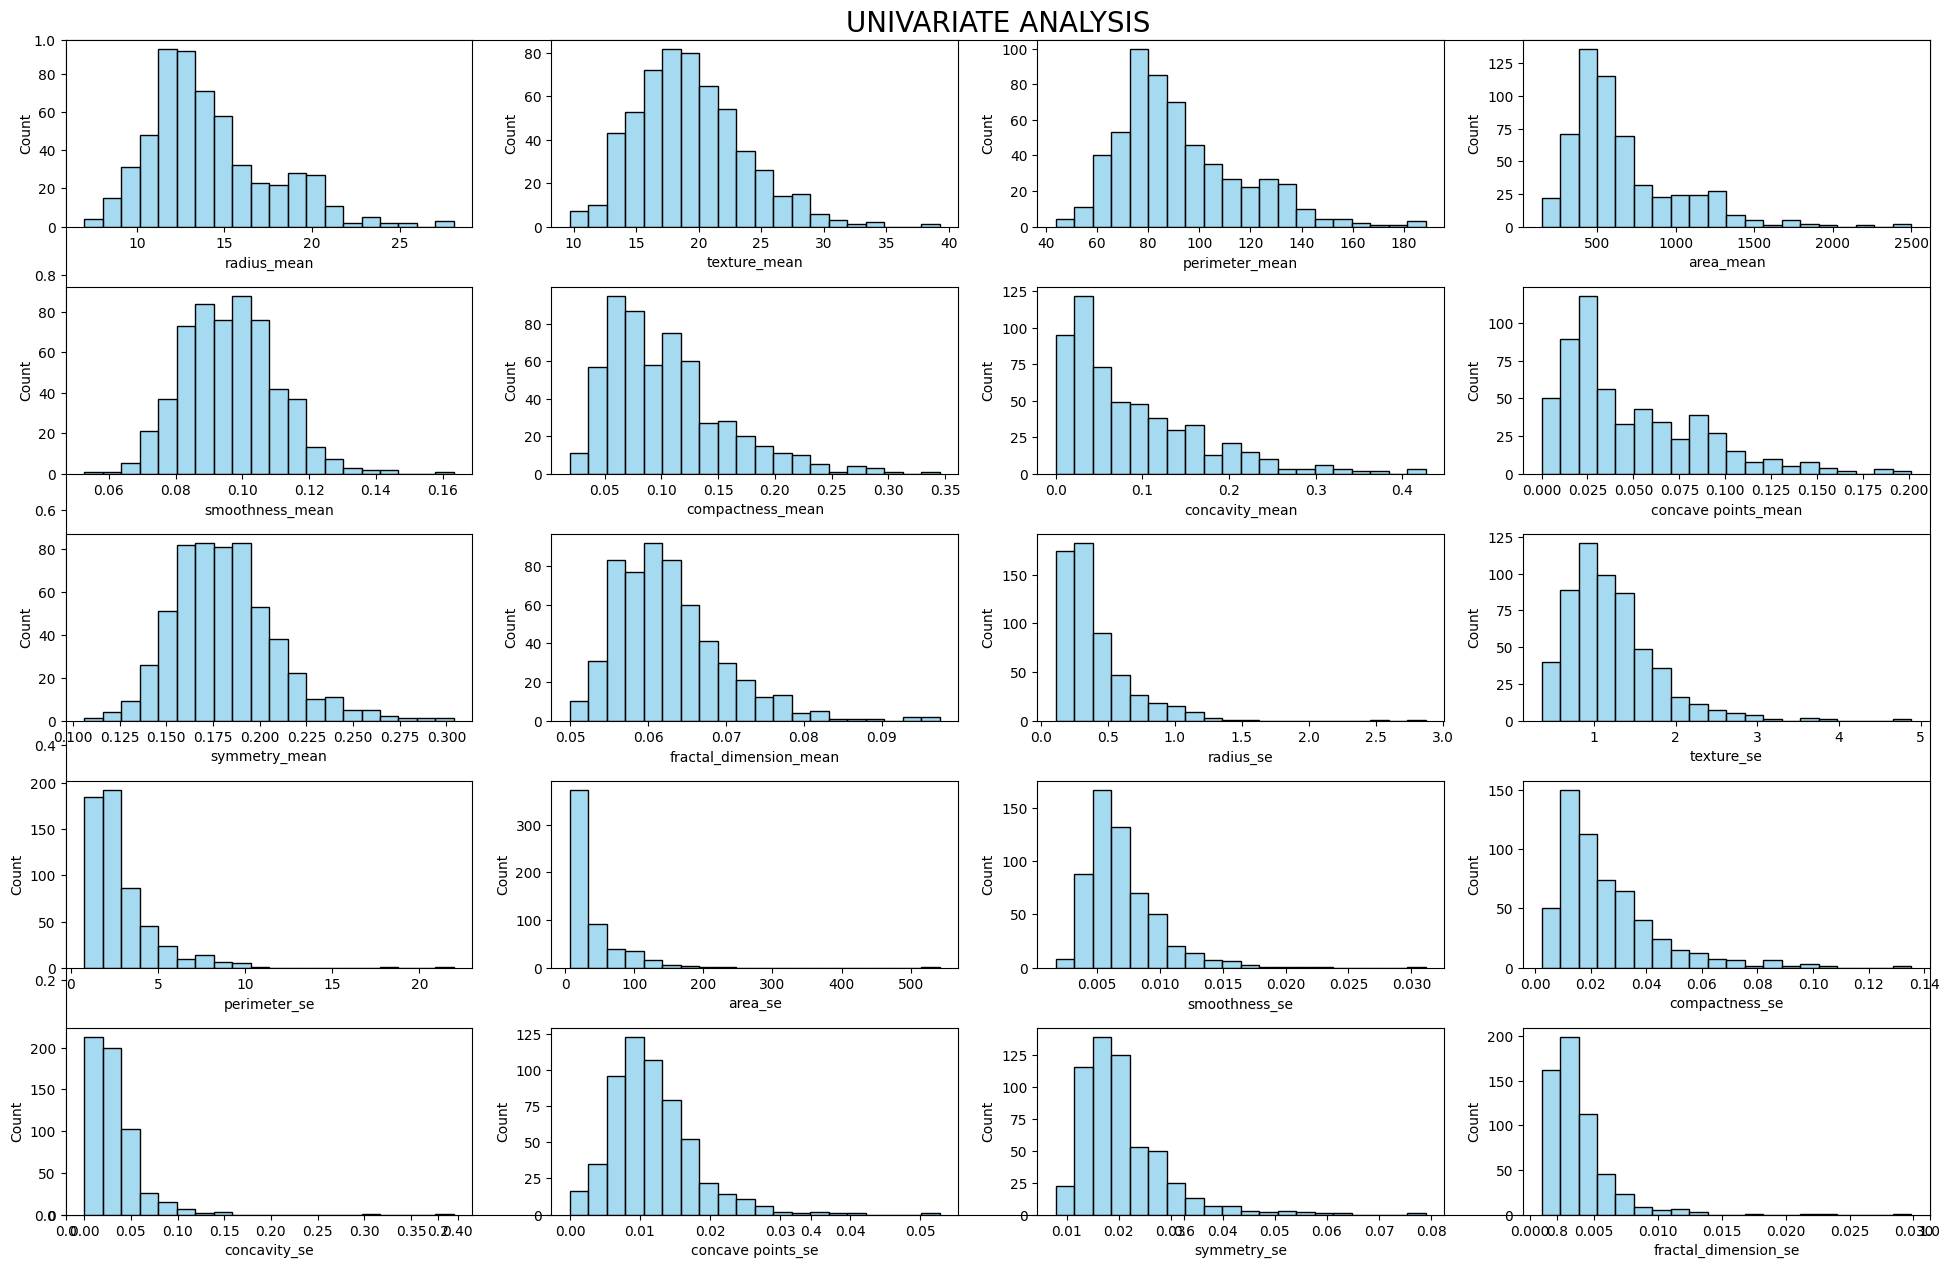

In [123]:
# numerical
plt.figure(figsize=(20, 13))
plt.title("Univariate Analysis".upper(), fontsize=20)
for i, column in enumerate(numerical):
    plt.subplot(5, 4, i+1)
    sns.histplot(df[column], bins=20, color="skyblue")
    plt.tight_layout(pad=1.0) # -> Memberikan jarak setiap visualisasi  
plt.show()

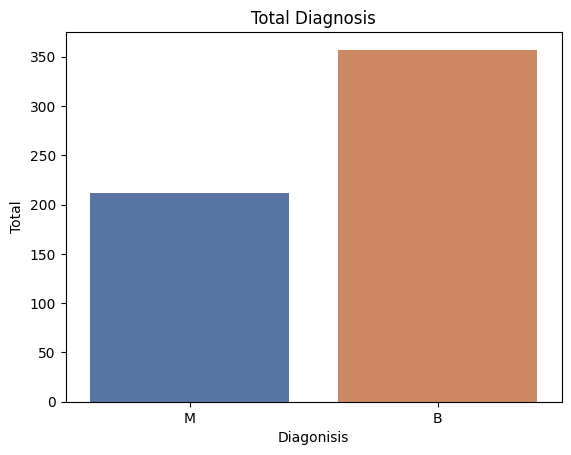

In [124]:
# categorical
plt.title("Total Diagnosis")
sns.countplot(x=categorical[0], data=df, palette="deep", hue="diagnosis")
plt.xlabel("Diagonisis")
plt.ylabel("Total")
plt.show()

Check Unique Categorical

In [125]:
df[categorical[0]].unique()

array(['M', 'B'], dtype=object)

Check Outliers

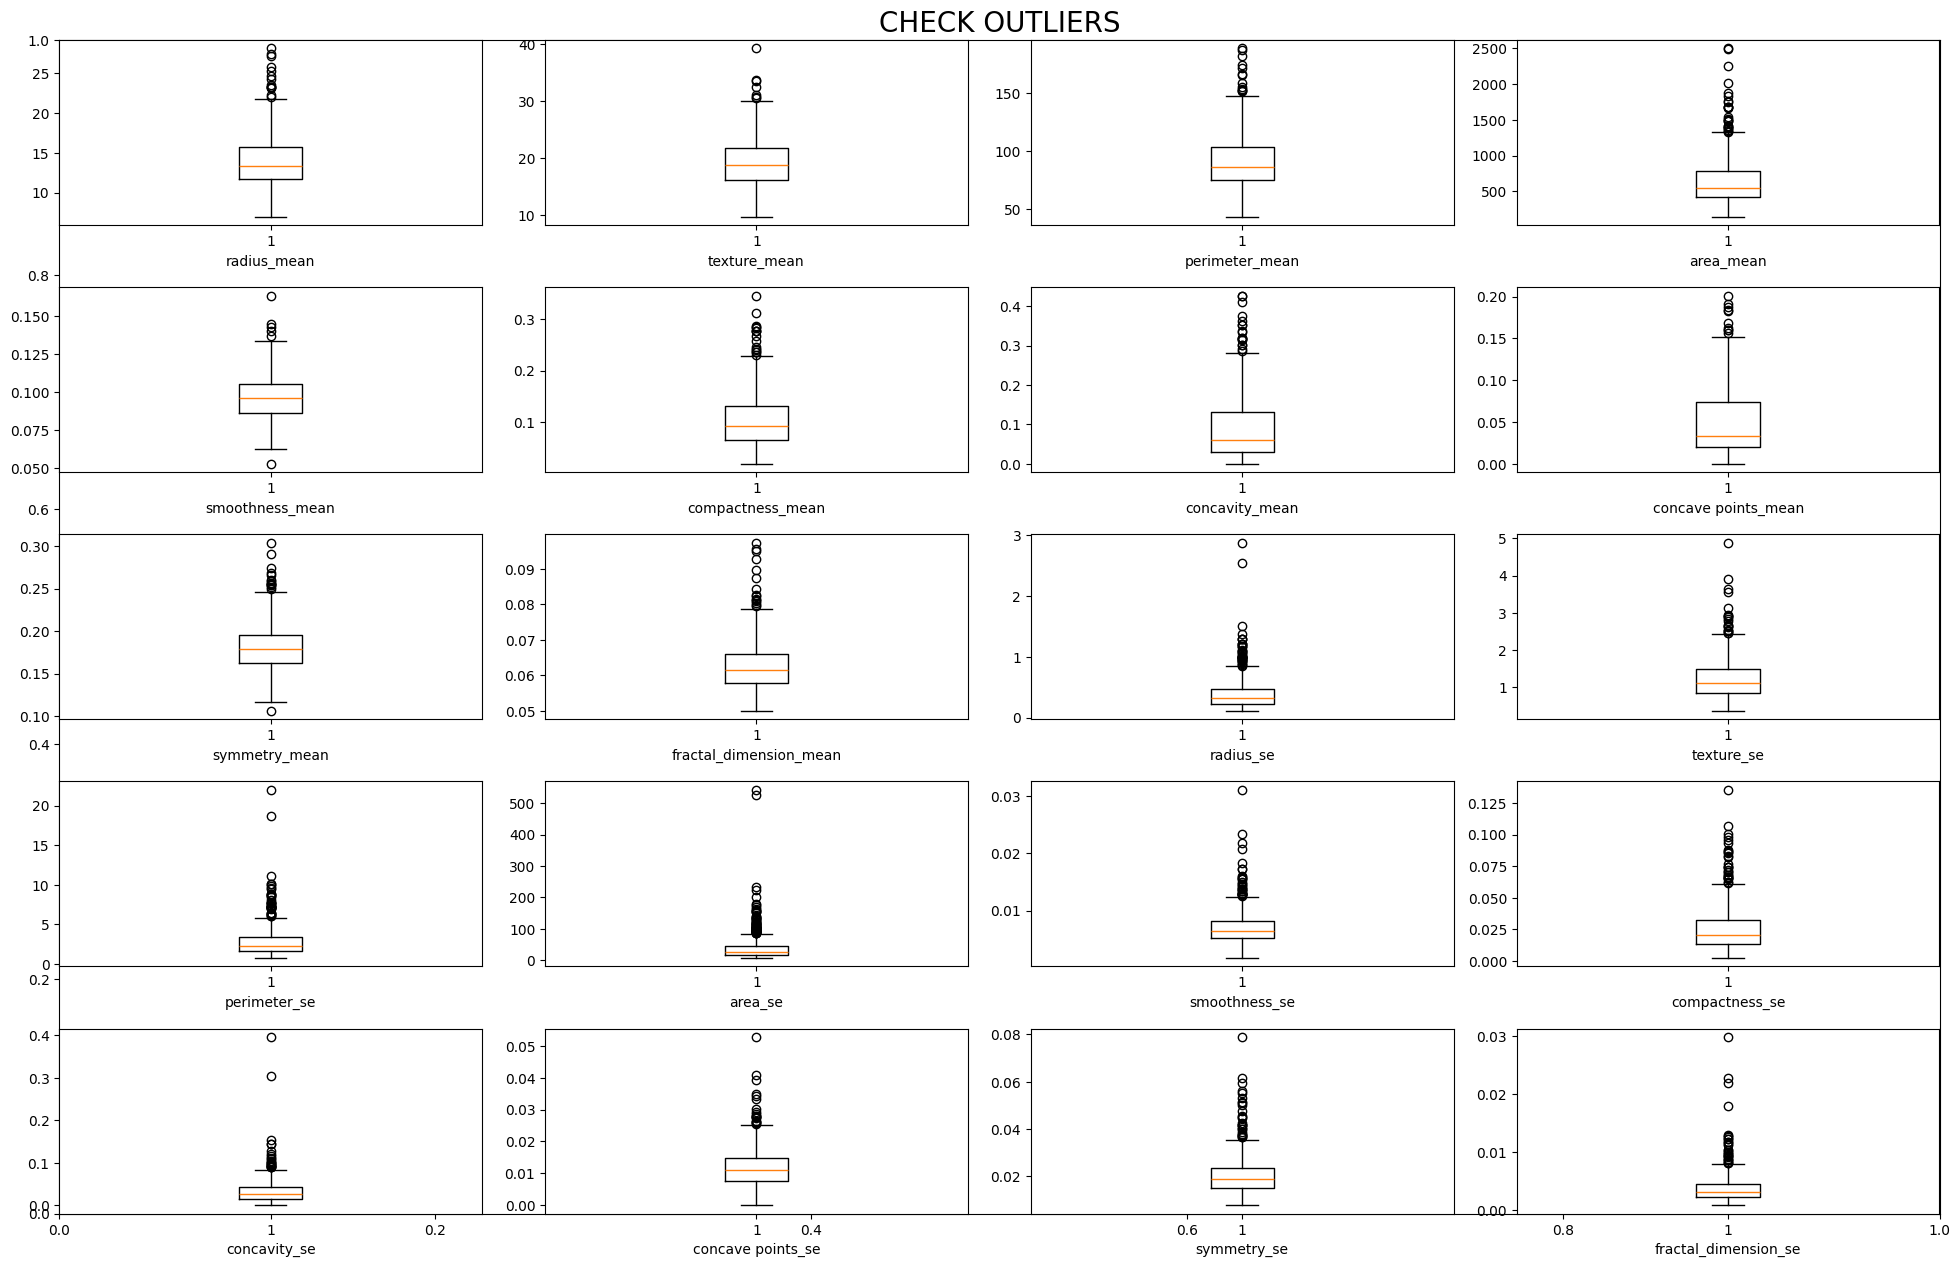

In [126]:
plt.figure(figsize=(20, 13))
plt.title("Check Outliers".upper(), fontsize=20)
for i, column in enumerate(numerical):
    plt.subplot(5, 4, i+1)
    plt.boxplot(x=df[column])
    plt.tight_layout(pad=1.0) # -> Memberikan setiap jarak pada visualisasi  
    plt.xlabel(column)
plt.show()

Bivariate Analysis

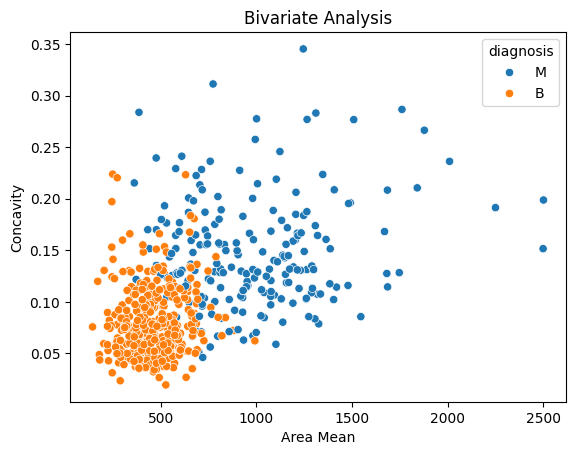

In [127]:
plt.title("Bivariate Analysis")
sns.scatterplot(x="area_mean", y="compactness_mean", data = df, hue="diagnosis")
plt.xlabel("Area Mean")
plt.ylabel("Concavity")
plt.show()

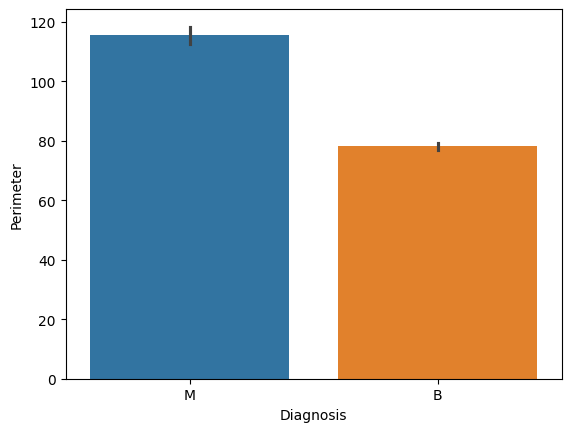

In [128]:
sns.barplot(data=df, x="diagnosis", y="perimeter_mean", palette="tab10", hue="diagnosis")
plt.xlabel("Diagnosis")
plt.ylabel("Perimeter")
plt.show()

Multivariate Analysis

In [129]:
correlation = df[numerical].corr()

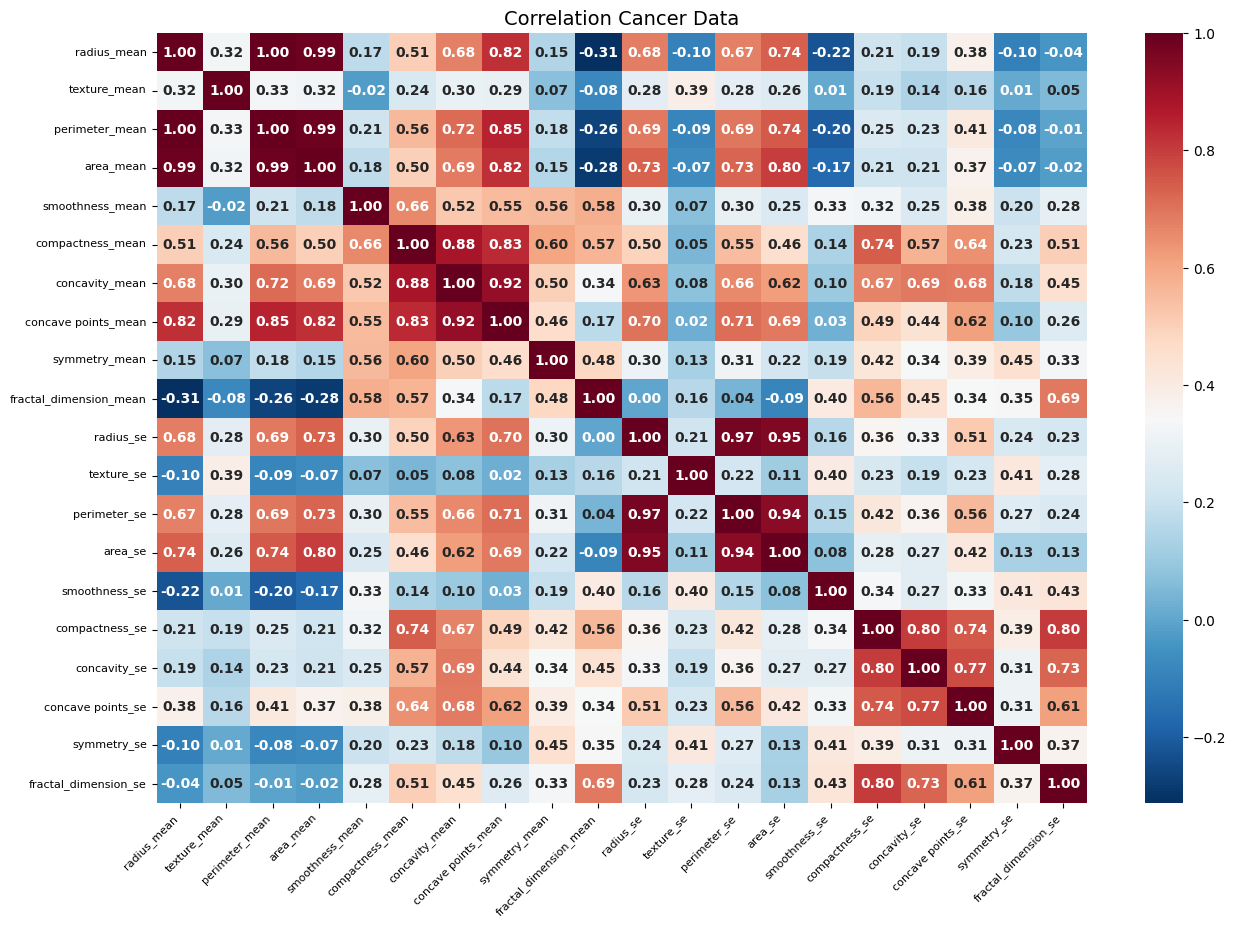

In [130]:
plt.figure(figsize=(15,10))
sns.heatmap(correlation, annot=True, fmt=".2f", cmap="RdBu_r", annot_kws={"size":10, "weight":"bold"})   # angka kecil

# Mengatur posisi/ukuran label
plt.xticks(rotation=45, ha="right", fontsize=8) 
plt.yticks(fontsize=8)

plt.title("Correlation Cancer Data", fontsize=14)

plt.show()

Fix Outliers

In [131]:
# Jika outliers terlalu parah, gunakan clip
clipped = df.copy()
for col in numerical:
    q1 = df[col].quantile(0.25)
    q3 = df[col].quantile(0.75)
    iqr = q3 - q1
    lower = q1 - 1.5*iqr
    upper = q3 + 1.5*iqr

    # Mengganti nilai ekstrem menjadi ke batas iqr
    clipped[col] = clipped[col].clip(lower, upper)

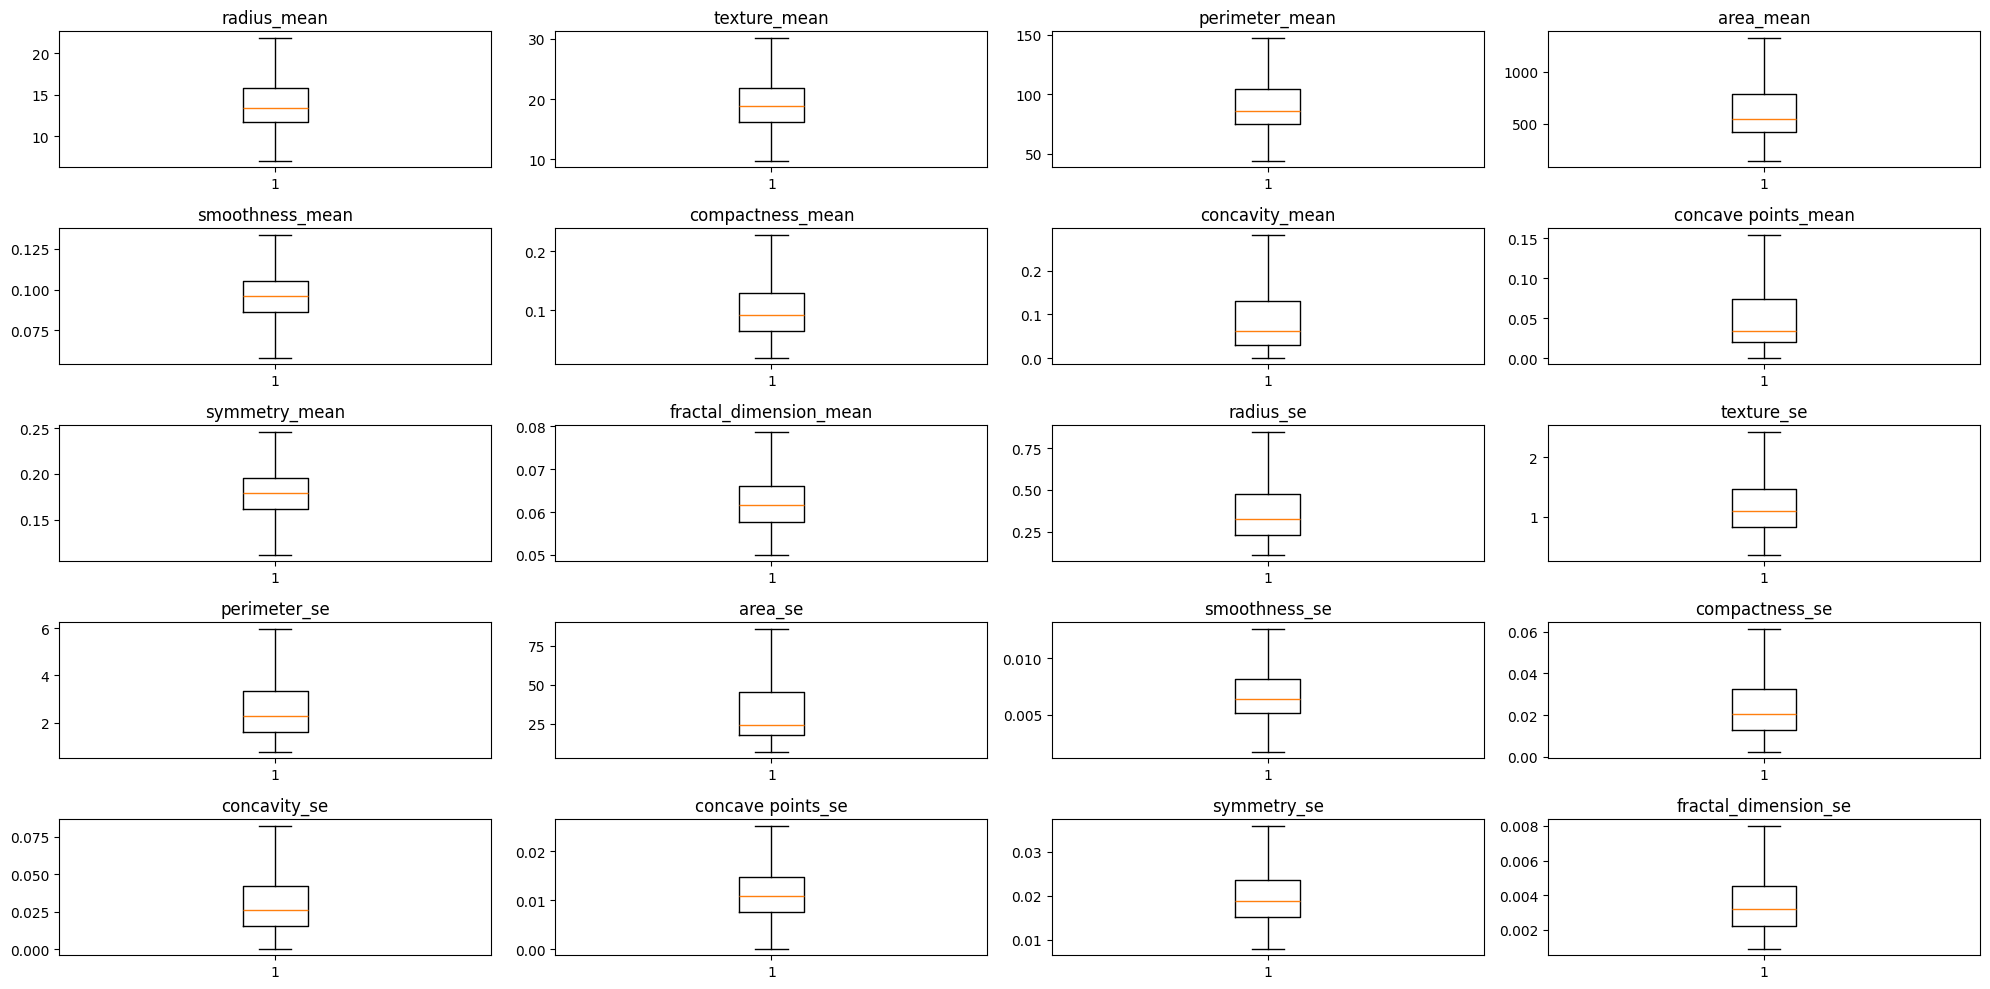

In [132]:
plt.figure(figsize=(20, 10))
for i, col in enumerate(numerical):
    plt.subplot(5, 4, i+1)
    plt.boxplot(clipped[col])
    plt.title(col)
plt.tight_layout()
plt.show()

In [133]:
df_clean = clipped.copy()

In [134]:
df_clean

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave points_se,symmetry_se,fractal_dimension_se
0,M,17.99,10.38,122.80,1001.0,0.118400,0.22862,0.28241,0.14710,0.2419,...,0.84865,0.90530,5.9835,86.20,0.006399,0.049040,0.05373,0.01587,0.03003,0.006193
1,M,20.57,17.77,132.90,1326.0,0.084740,0.07864,0.08690,0.07017,0.1812,...,0.54350,0.73390,3.3980,74.08,0.005225,0.013080,0.01860,0.01340,0.01389,0.003532
2,M,19.69,21.25,130.00,1203.0,0.109600,0.15990,0.19740,0.12790,0.2069,...,0.74560,0.78690,4.5850,86.20,0.006150,0.040060,0.03832,0.02058,0.02250,0.004571
3,M,11.42,20.38,77.58,386.1,0.133695,0.22862,0.24140,0.10520,0.2464,...,0.49560,1.15600,3.4450,27.23,0.009110,0.061505,0.05661,0.01867,0.03596,0.008023
4,M,20.29,14.34,135.10,1297.0,0.100300,0.13280,0.19800,0.10430,0.1809,...,0.75720,0.78130,5.4380,86.20,0.011490,0.024610,0.05688,0.01885,0.01756,0.005115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1326.3,0.111000,0.11590,0.24390,0.13890,0.1726,...,0.84865,1.25600,5.9835,86.20,0.010300,0.028910,0.05198,0.02454,0.01114,0.004239
565,M,20.13,28.25,131.20,1261.0,0.097800,0.10340,0.14400,0.09791,0.1752,...,0.76550,2.43415,5.2030,86.20,0.005769,0.024230,0.03950,0.01678,0.01898,0.002498
566,M,16.60,28.08,108.30,858.1,0.084550,0.10230,0.09251,0.05302,0.1590,...,0.45640,1.07500,3.4250,48.55,0.005903,0.037310,0.04730,0.01557,0.01318,0.003892
567,M,20.60,29.33,140.10,1265.0,0.117800,0.22862,0.28241,0.15200,0.2397,...,0.72600,1.59500,5.7720,86.20,0.006522,0.061505,0.07117,0.01664,0.02324,0.006185


Split data into X and y

In [135]:
X = df_clean.drop(columns="diagnosis")
y = df_clean["diagnosis"]

In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

Encode Categorical Label

In [137]:
encode = LabelEncoder()
y_train = encode.fit_transform(y_train)
y_test = encode.transform(y_test)

Feature Scaling

In [138]:
scaling = StandardScaler()
X_train = scaling.fit_transform(X_train)
X_test = scaling.transform(X_test)

Selecting the best neighbors

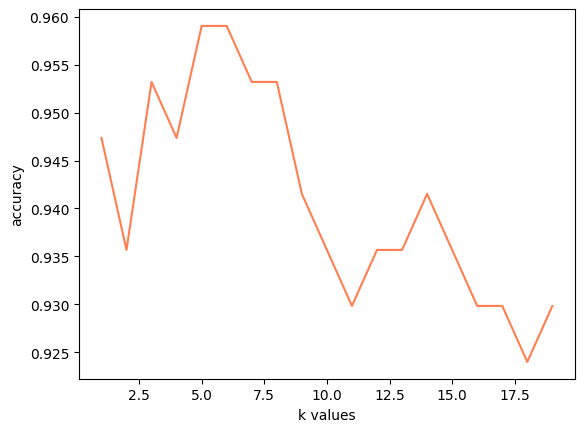

In [139]:
neighbors_score = []

for number in range(1,20):
    knn = KNeighborsClassifier(n_neighbors=number)
    knn.fit(X_train, y_train)
    score_of_neighbors = knn.score(X_test, y_test)
    neighbors_score.append(score_of_neighbors)

plt.plot(range(1,20),neighbors_score, color="coral")
plt.xlabel("k values")
plt.ylabel("accuracy")
plt.show()

KNeighborsClassifier

In [140]:
knn5 = KNeighborsClassifier(n_neighbors = 5, weights="distance", p=2, metric="minkowski")

In [141]:
# Training
knn5.fit(X_train, y_train)
print(f"Training Score : {knn5.score(X_train, y_train):.4f}")

Training Score : 1.0000


In [142]:
# Predict
y_predict = knn5.predict(X_test)
print(f"Accuracy Score : {knn5.score(X_test, y_test):.4f}")

Accuracy Score : 0.9591


Visualisasi Result Predict

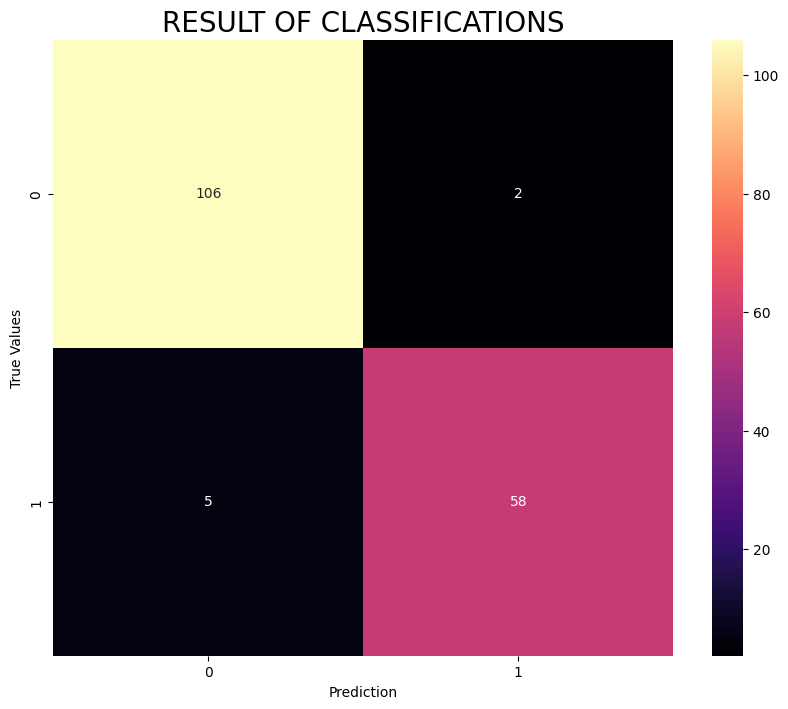

In [143]:
cm = confusion_matrix(y_test, y_predict.reshape(-1))

plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, fmt="d", cmap="magma")
plt.xlabel("Prediction")
plt.ylabel("True Values")
plt.title("Result of Classifications".upper(), fontsize=20)
plt.show()

In [144]:
correct_predict = np.trace(cm)
total_predict = np.sum(cm)
incorrect_predict = total_predict - correct_predict

print(f"correct_predict : {correct_predict}")
print(f"incorrect_predict : {incorrect_predict}")

correct_predict : 164
incorrect_predict : 7


## Evaluation

ROC-AUC

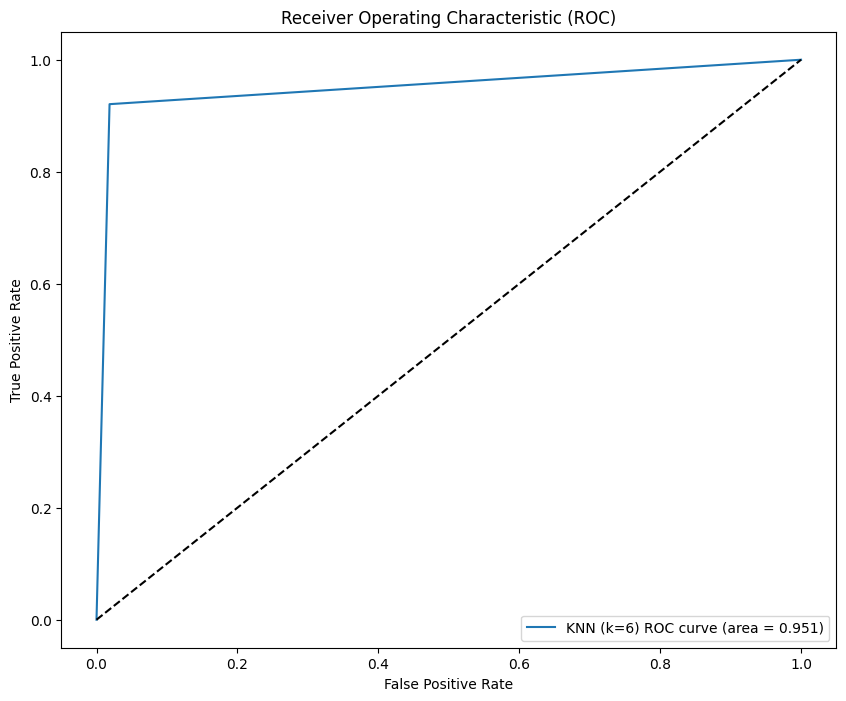

In [145]:
fpr, tpr, thresholds = roc_curve(y_test, y_predict)
roc_auc = auc(fpr, tpr)             

plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, label=f'KNN (k={6}) ROC curve (area = {roc_auc:.3f})')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()